# PROBLEM STATEMENT
## This Project is about an Ed Tech company which offers curated online courses for working professionals and students alike , in various areas and workstreams
### The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

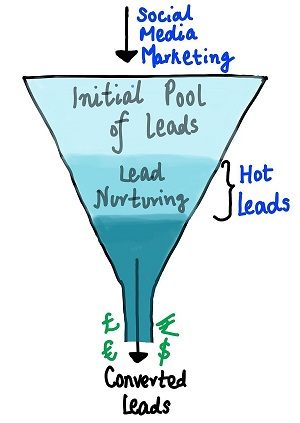

# OBJECTIVE:
### As per image above the large initial pool of leads, sourced from different marketing streams has to be funneled into a select pool of leads which have high chance of conversion, this pool is termed as "Hot Leads". The current conversion rate from initial large pool of leads to actual converted leads is 30%
### The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 
### It is expected , after deployment of this predictive model , the conversion rate would improve from current 30 % to 80 %

### Importing Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

### Input the data

In [3]:
## Importing csv input data
ldf=pd.read_csv("Leads.csv")

In [4]:
#Displaying the content of the data
ldf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect the data

In [5]:
# Size of data
ldf.shape

(9240, 37)

In [6]:
ldf.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
ldf.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

### Data Cleaning

In [8]:
#Percentage of null values in data

ldf_nan = 100 * (ldf.isnull().sum() / len(ldf)).sort_values(ascending=False)

ldf_nan

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### Handling "Select"
### The "Select" tab in any digital form will have a field, the lead has not chosen any option field hence "Select" if it is present means that no data and is as good as Nan value



In [9]:
#Inspecting all the columns with Select variable in the dataframe.
colwithselect = ldf.isin(["Select"]).any()
print(colwithselect)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [10]:
#df.replace() will replace all the occurances of the given string to missing values.
ldf.replace('Select', np.nan,inplace=True)

In [11]:
## Calculate the null value percentage again
ldf_nan = 100 * (ldf.isnull().sum() / len(ldf)).sort_values(ascending=False)

ldf_nan

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [12]:
# define 'cutoff_30' which is 40% of the total number of entries in the columns of leads data
cutoff_40 = len(ldf)/2.5
cutoff_40

3696.0

### Handling Null Values removing columns with null values > 40 %

In [13]:
# Retain columns having null values < 40% in application data
ldf.columns[ldf.isnull().sum() < cutoff_40]

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
ldf = ldf[ldf.columns[ldf.isnull().sum() < cutoff_40] ]
ldf.shape

(9240, 30)

In [15]:
## Calculate the null value percentage again
ldf_nan = 100 * (ldf.isnull().sum() / len(ldf)).sort_values(ascending=False)

ldf_nan

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### Imputing the Null values, grouping less significant attributes in "Others"

In [16]:
ldf['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [17]:
#We also handle the missing values for this City column, we add another column known as "No City Specified" for all missing values.
ldf.City.fillna('No City Specified', inplace=True)

In [18]:
ldf['City'].value_counts(normalize=True)

No City Specified              0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [19]:
ldf['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [20]:
#We also handle the missing values for this Specialisation column, we add another column known as "Not Specified" for all missing values.
ldf.Specialization.fillna('Not Specified', inplace=True)

In [21]:
#Inspecting the column again to recheck the same.
ldf['Specialization'].value_counts(normalize=True)

Not Specified                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [22]:
ldf['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [23]:
#We also handle the missing values for this Tags column, we add another column known as "Not Specified" for all missing values.
ldf.Tags.fillna('Not Specified', inplace=True)

In [24]:
ldf['Tags'].value_counts(normalize=True)

Not Specified                                        0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [25]:
ldf['What matters most to you in choosing a course'].value_counts(normalize=True)
## This column need to be dropped because the data is skewed

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [26]:
ldf['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [27]:
ldf['Country'].value_counts(normalize=True)
## This column need to be dropped because the data is skewed

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [28]:
ldf['Page Views Per Visit'].value_counts(normalize=True)

0.00    0.240470
2.00    0.197188
3.00    0.131385
4.00    0.098429
1.00    0.071515
          ...   
3.43    0.000110
2.56    0.000110
6.33    0.000110
1.64    0.000110
2.08    0.000110
Name: Page Views Per Visit, Length: 114, dtype: float64

In [29]:
ldf['Page Views Per Visit'].median()

2.0

In [30]:
## Imputing Nan with meadian for Page Views per visit
ldf['Page Views Per Visit'].fillna(ldf['Page Views Per Visit'].median(), inplace=True)

In [31]:
ldf['TotalVisits'].value_counts(normalize=True)

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
24.0     0.000549
25.0     0.000549
27.0     0.000549
22.0     0.000330
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0     0.000110
Name: TotalVisits, dtype: float64

In [32]:
#Imputing missing values in 'TotalVisits' with mean/median which is 3. 
ldf['TotalVisits'].fillna(ldf['TotalVisits'].median(),inplace=True)

In [33]:
ldf.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [34]:
ldf['Last Activity'].value_counts(normalize=True) 

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [35]:
#Imputing missing values in 'Last Activity' with mode. 
ldf['Last Activity'].fillna('Email Opened',inplace=True)

In [36]:
ldf['Last Activity'].value_counts(normalize=True) 

Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [37]:
ldf.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [38]:
ldf['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [39]:
#Imputing missing values in 'Lead Source' with mode. 
ldf['Lead Source'].fillna('Google',inplace=True)

In [40]:
ldf['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [41]:
ldf['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [42]:
#Imputing missing values in 'What is your current occupation' with mode. 
ldf['What is your current occupation'].fillna('Unemployed',inplace=True)

In [43]:
ldf['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [44]:
ldf.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [45]:
## Dropping 'Country' and 'What matters most to you in choosing a course', because of high data imbalance
ldf.drop(['Country','What matters most to you in choosing a course'],axis=1,inplace=True)

In [46]:
## We have 28 columns in the Data frame, lets look at each of them in detail
ldf.shape

(9240, 28)

In [47]:
ldf.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

### We have no null values in the data frame; for the categorical variables we have imputed with mode and for the continuous variables we have imputed with median

### Now we will eliminate column with high skewed data as this would not provide meaningful outcome for our analysis , chances are that these parameters could force our prediction to go in one direction

In [48]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [49]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [50]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [51]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [52]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [53]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [54]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [55]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [56]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [57]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [58]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [59]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [60]:
#Checking uniqueness in all categorical variables ; this is skewed data and should be taken out
ldf['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

### Data Cleaning - Dropping highly skewed indpendent variables

### Dropping highky skewed columns is important because : there is a high data imbalance amongst the columns and it does not add more value to model building.

### Following Columns To Be Drop:

### Do Not Email , Do Not Call ,Search,Magazine,Newspaper Article, X Education Forums,Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque




In [61]:
#Using drop to remove columns with high data imbalance 
ldf.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [62]:
ldf.shape

(9240, 15)

In [63]:
## Looking at the 'City' feature
ldf['City'].value_counts(normalize=True)

No City Specified              0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

### In the Data frame 'City' feature has data max number as Mumbai and 39 % have no attribute
### In the Data frame 'Tags' is the feature for which the company has already contacted the lead, hence this data become not relevant

In [64]:
ldf.drop(['Tags','City'],axis=1,inplace=True)

### In the data frame Last activity is "Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc."  And Last Notable Activity is "The last notable acitivity performed by the student."    Hence it makes sense to eliminate Last Notable activity feature from the data as this pertains to the students , i.e already a converted lead

In [65]:
ldf.drop(['Last Notable Activity'],axis=1,inplace=True)

In [66]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

### We have final useful data with 12 features

In [67]:
#Checking for any duplicates in the data.
ldf.loc[ldf.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview


### Data Cleaning - Combining columns having low percentages into one single column.

In [68]:
#Displaying the data types on different columns
ldf.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

### Data Cleaning - Combining columns having low percentages into one single column.
**Following are the columns in which categories are to be combined and form "Others" category :-**

- Lead Origin
- Lead Source
- Last Activity
- Specialization
- What is your current occupation 

### Lead Origin

In [69]:
#Inspecting the column again
ldf['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [70]:
#Combining categories with very low row percentages as it does not make sense to create dummies for such rows.
ldf['Lead Origin'] = ldf['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')

In [71]:
#Checking if the category has been correctly replaced. 
ldf['Lead Origin'].value_counts(normalize=True) 

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64

### Lead Source

In [72]:
#Inspecting the column again
ldf['Lead Source'].value_counts(normalize=True)

Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [73]:
#Combining categories
ldf['Lead Source'] = ldf['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

In [74]:
#Checking if the category has been correctly replaced. 
ldf['Lead Source'].value_counts(normalize=True) 

Google            0.314286
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Others            0.037879
Name: Lead Source, dtype: float64

### Last Activity

In [75]:
#Inspecting the column again
ldf['Last Activity'].value_counts(normalize=True)

Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [76]:
#Combining together to form 'Others' Categories. 
ldf['Last Activity']=ldf['Last Activity'].replace(['Form Submitted on Website'      ,
'Unreachable'                    ,
'Unsubscribed'                   ,
'Had a Phone Conversation'       ,
'Approached upfront'             ,
'View in browser link Clicked'   ,
'Email Received'                 ,
'Email Marked Spam'              ,
'Visited Booth in Tradeshow'     ,
'Resubscribed to emails'],'Others') 

In [77]:
#Inspecting the column again
ldf['Last Activity'].value_counts(normalize=True)

Email Opened               0.383117
SMS Sent                   0.297078
Olark Chat Conversation    0.105303
Page Visited on Website    0.069264
Converted to Lead          0.046320
Email Bounced              0.035281
Others                     0.034740
Email Link Clicked         0.028896
Name: Last Activity, dtype: float64

### Specialization

In [78]:
#Inspecting the column again
ldf['Specialization'].value_counts(normalize=True)

Not Specified                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [79]:
#Combining categories < 2%  into 'Others'
ldf['Specialization']=ldf['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence','Hospitality Management','E-COMMERCE','Retail Management','International Business','Healthcare Management'],'Others')      

In [80]:
#Inspecting the column again
ldf['Specialization'].value_counts(normalize=True)

Not Specified                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Others                               0.090152
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
Name: Specialization, dtype: float64

### Current Ocupation

In [81]:
#Inspecting the column again
ldf['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [82]:
#Combining categories 
ldf['What is your current occupation']=ldf['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [83]:
#Inspecting the column again
ldf['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Others                  0.003680
Name: What is your current occupation, dtype: float64

In [84]:
ldf['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

## EDA (Exploratory Data Analysis)

In [85]:
ldf.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

### EDA - Numerical Variables

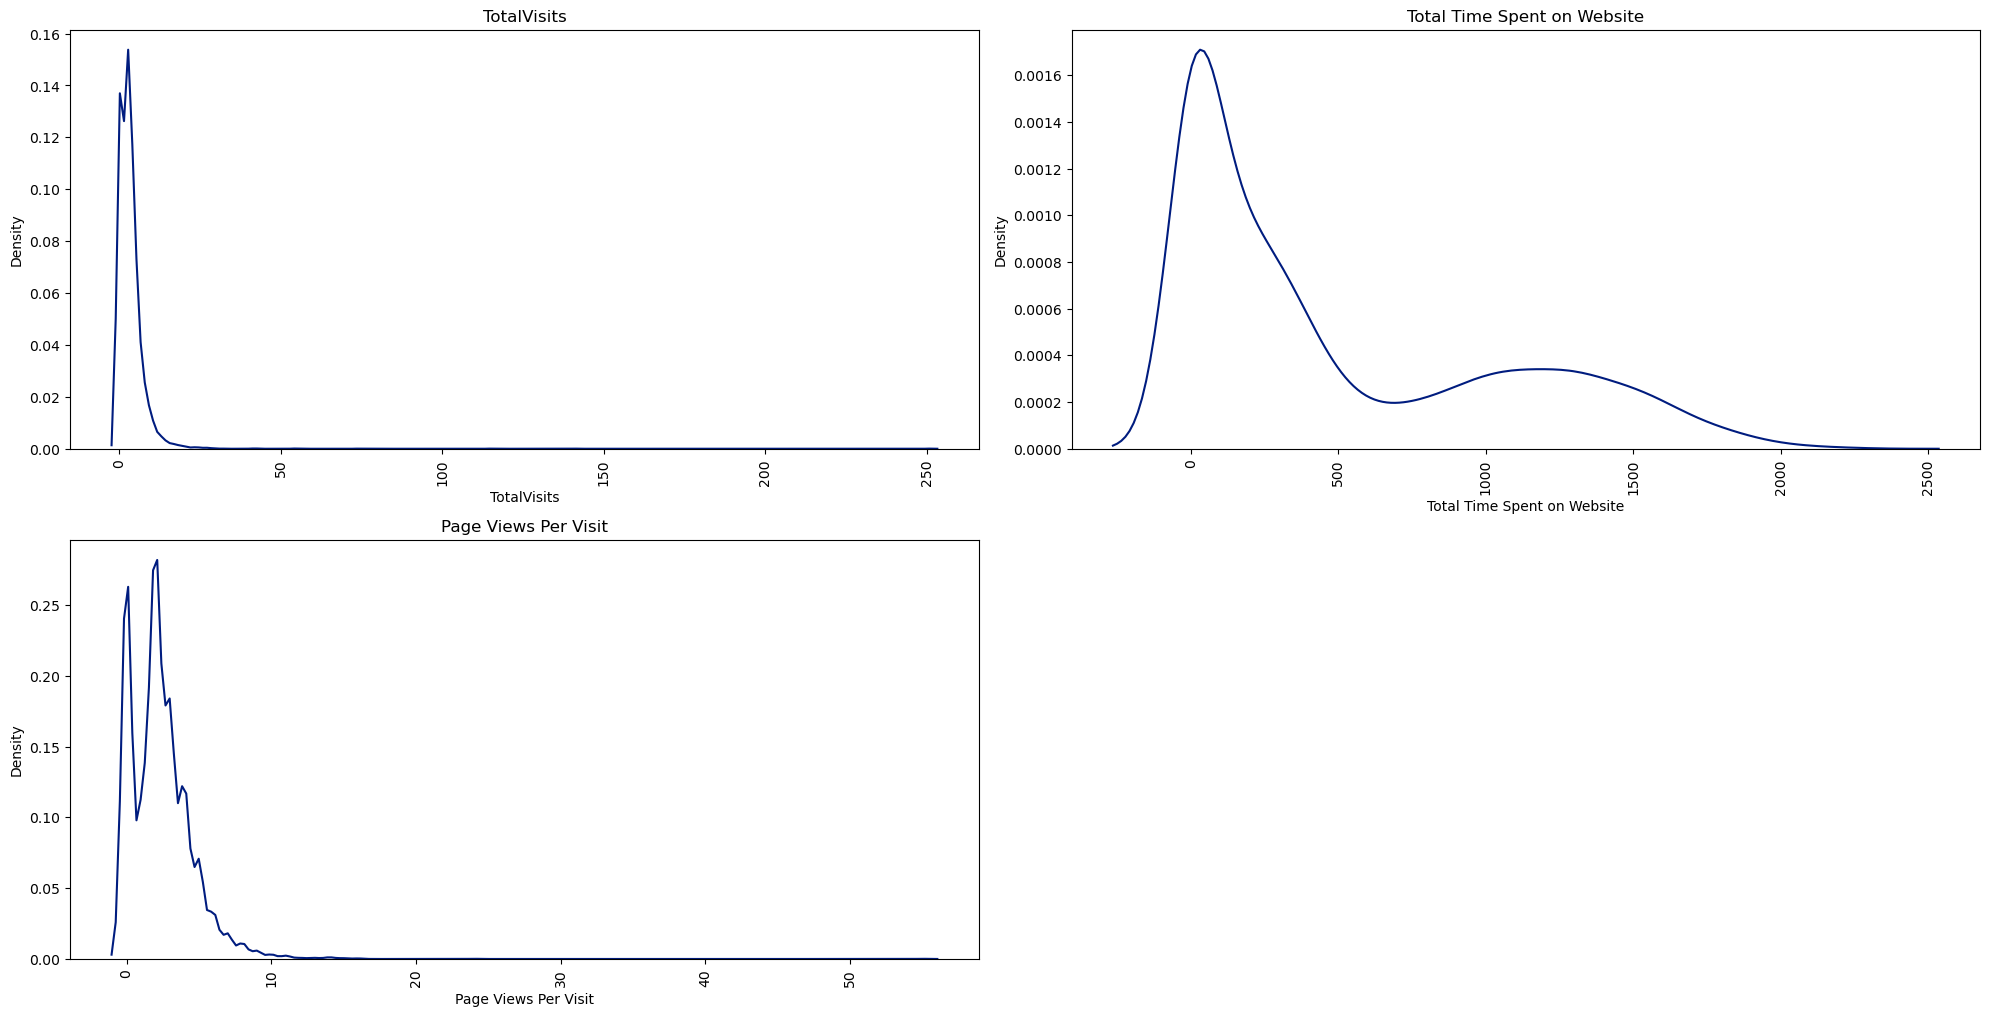

In [86]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("dark")
plt.figure(figsize = (20, 20))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(ldf[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)

### Observation:
1) For maximum number of leads total visits to the sites fall between 15 to 20

2) Most leads spend around 300 seconds looking and browsing through the website

3) High number of leads visit around 5 pages of the website when they visit

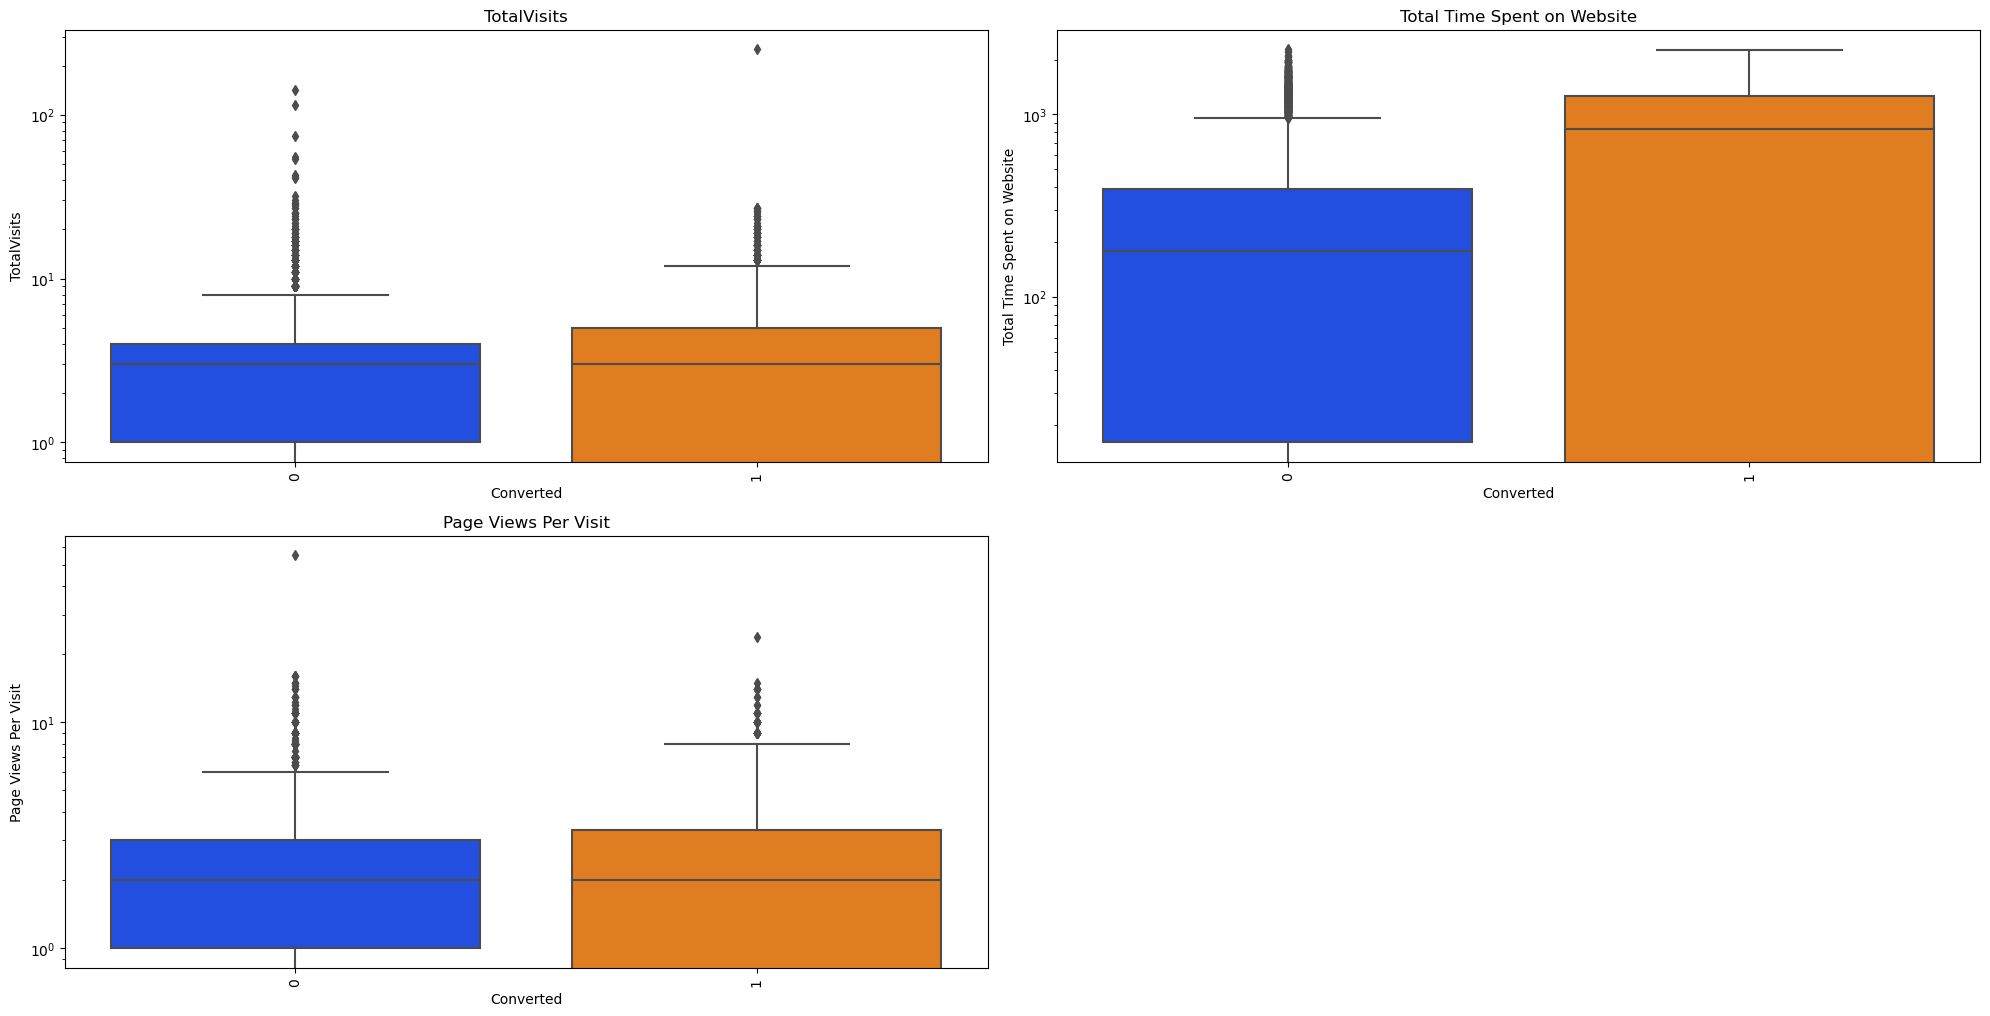

In [87]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("bright")
plt.figure(figsize = (20, 20))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='Converted', y=col[1], data = ldf)
    ax.set_yscale('log')
    plt.tight_layout()
    plt.xticks(rotation = 90)

### Observation: 
### 1) If the user spends more time browsing the website , thats a clear indication of the interest and high chance of conversion

### EDA - Categorical variables

In [88]:
#Copying from the lead dataframe for easier eda
ldfCopy = ldf.copy()

In [89]:
#Displaying the dataframe
ldfCopy.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No


In [90]:
ldfCopy['Category'] = ldfCopy.Converted.astype('category')

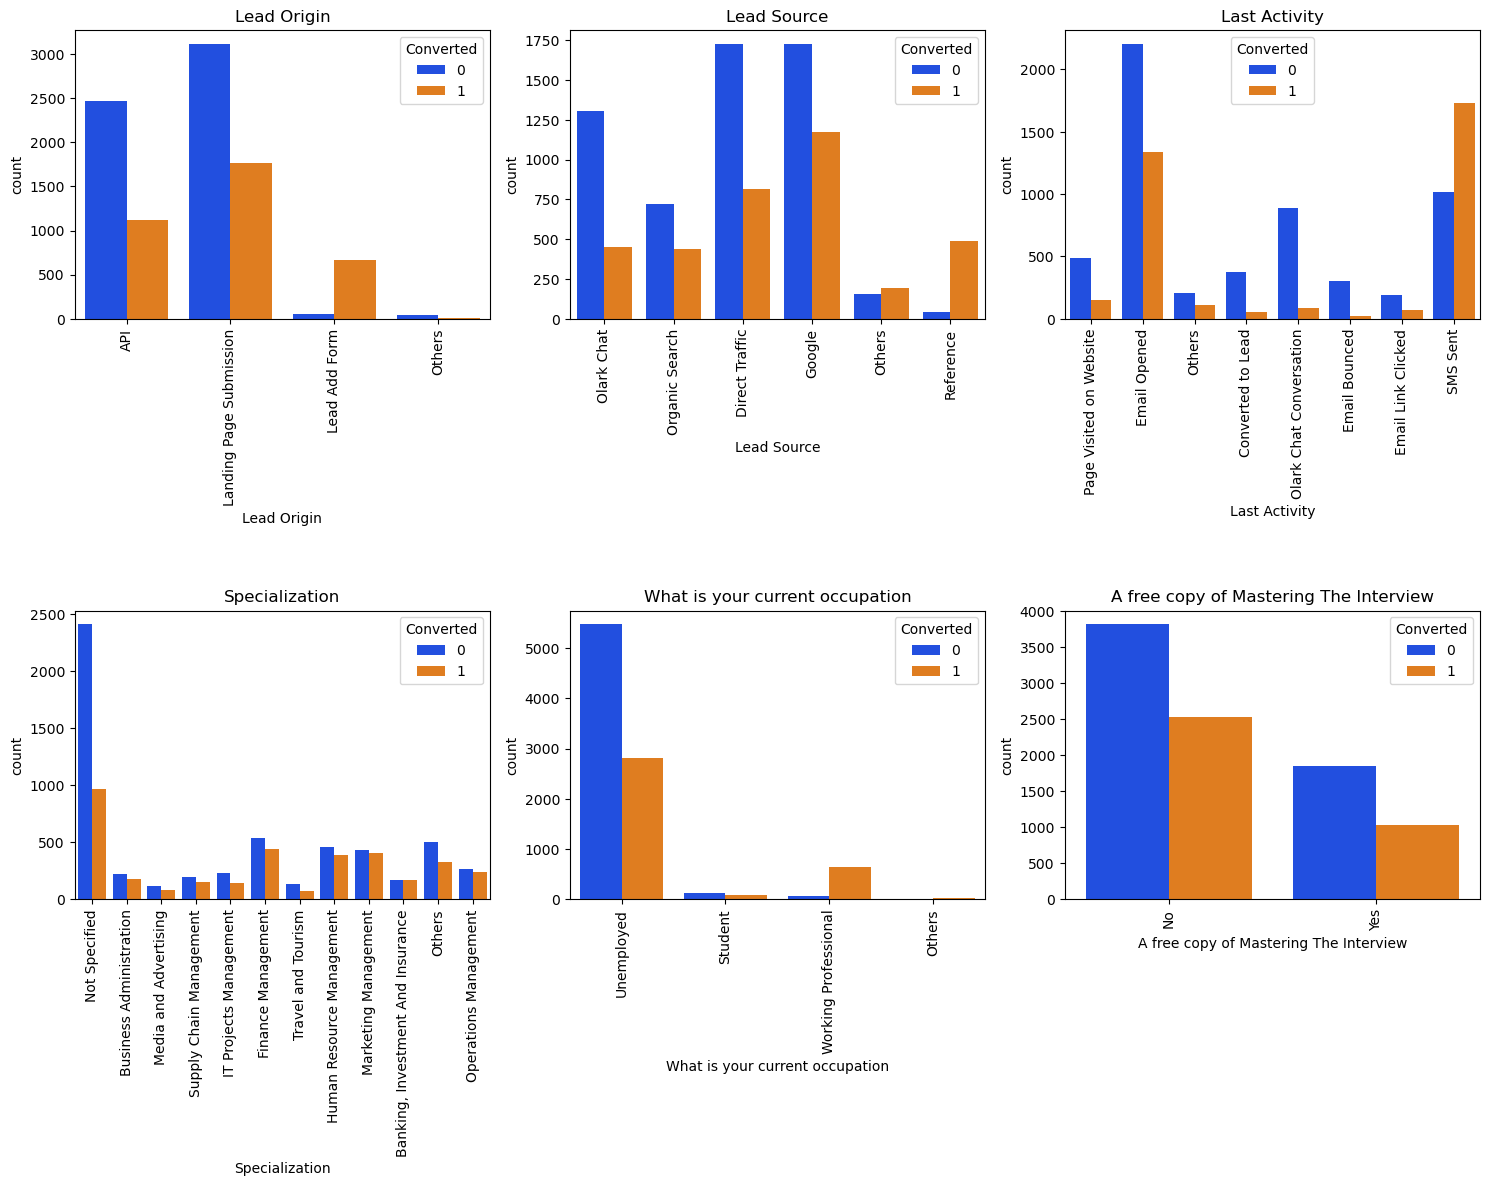

In [91]:
Required_columns= ['Lead Origin','Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(3, 3, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = ldfCopy, x=col[1], hue='Converted') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

### Observation: Chances of conversion are high for 
### 1) Customers who fills the form
### 2) Customers who have come with reference
### 3) Customers to whom sms has been sent
### 4) Cutomers who are working professionals

### Outliers Handling

In [92]:
ldf.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

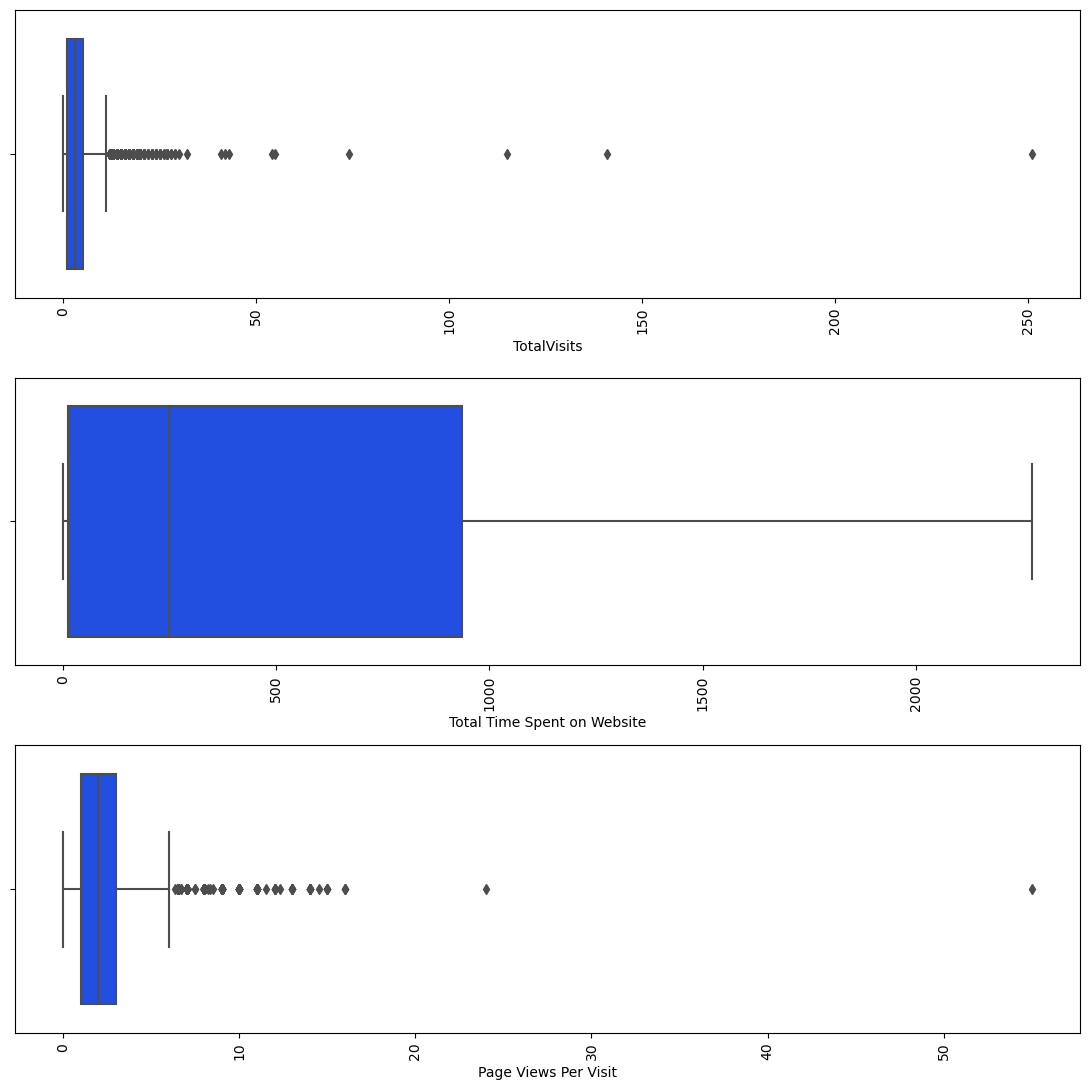

In [93]:
#There are 3 numerical columns - TotalVisits, Total Time Spent on Website, 'Page Views Per Visit
#Plotting them to check for outliers.

numerical_columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(3,1, col[0]+1)
    sns.boxplot(x = col[1], data = ldf)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [94]:
#cap1 will provide the difference between outliers and 99th percentile. 
#If the value is too big, we can conclude that there are outliers.
cap1 = ldf.TotalVisits.max() - ldf.TotalVisits.quantile(0.99)
cap1

234.0

In [95]:
#cap2 will provide the difference between outliers and 99th percentile. 
#If the value is too big, we can conclude that there are outliers.
cap2 = ldf['Page Views Per Visit'].max() - ldf['Page Views Per Visit'].quantile(0.99)
cap2

46.0

In [96]:
req_cols=['TotalVisits','Page Views Per Visit'] 
for col in req_cols:
    percentiles = ldf[col].quantile(0.99)  ## capping higher range outliers
    ldf[col][ldf[col] >= percentiles] = percentiles

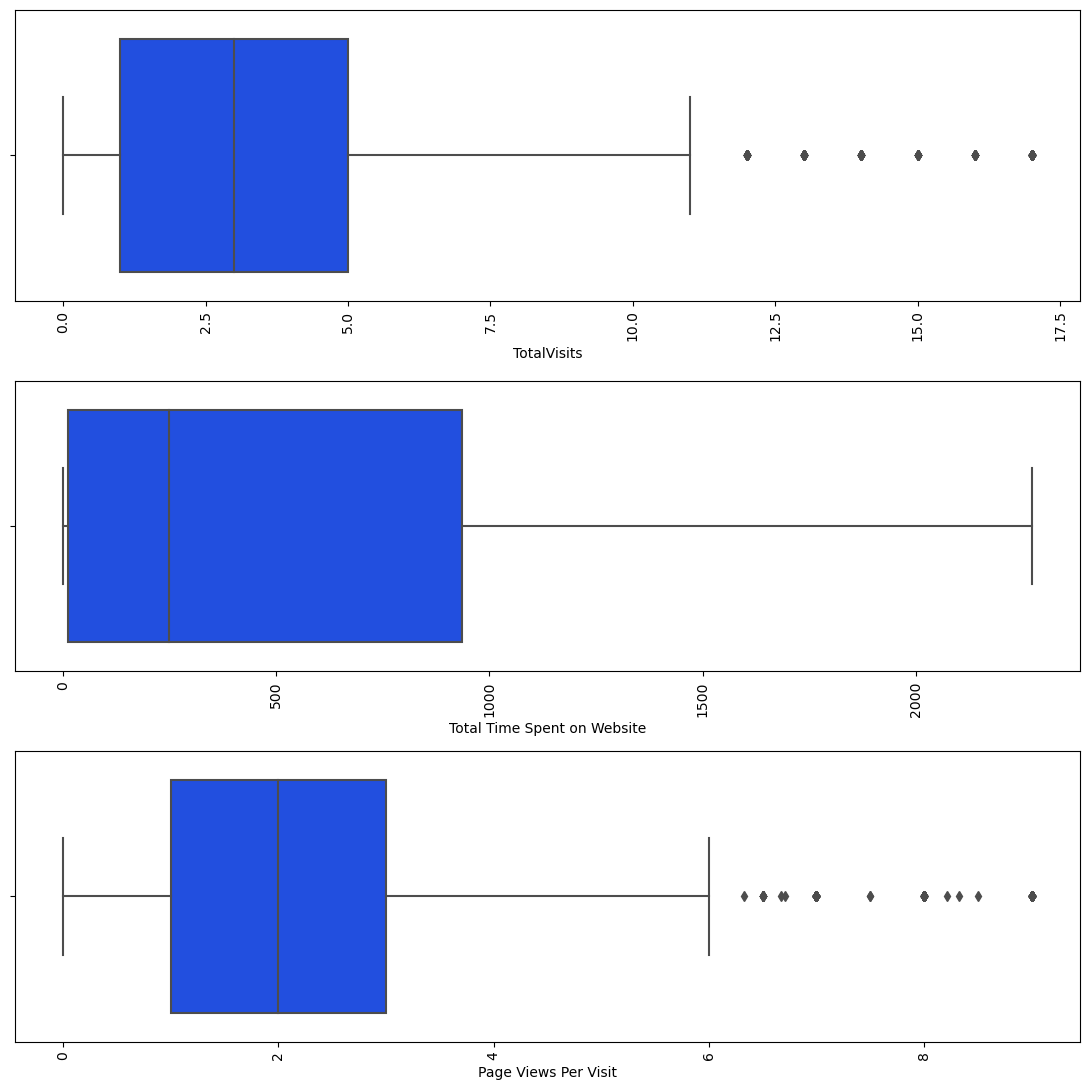

In [97]:
numerical_columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(3,1, col[0]+1)
    sns.boxplot(x = col[1], data = ldf)
    plt.xticks(rotation = 90)
    plt.tight_layout()

## Data Preparation

Following steps will be done as part of data preparation:

1. Converting binary variable (Yes/No) "A free copy of Mastering The Interview" to 1/0
2. Create dummies for categorical columns
3. Perform train-test split
4. Perform Scaling

**Converting Binary Variables**
- Any kind of Data Preparation while performing Model Building involves converting Yes/No columns to binary values.

In [98]:
varlist =['A free copy of Mastering The Interview']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

ldf[varlist] = ldf[varlist].apply(binary_map)

In [99]:
ldf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0


### **Create Dummies for Categorical columns**

In [100]:
#Rename the columns
ldf.rename(columns={'Total Time Spent on Website' : 'time_spent', 'What is your current occupation':'Occupation', 'A free copy of Mastering The Interview':'free_copy'}, inplace=True)

In [101]:
#Rename the columns
ldf.rename(columns={'Page Views Per Visit' : 'Views'}, inplace=True)

In [102]:
ldf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,time_spent,Views,Last Activity,Specialization,Occupation,free_copy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0


In [103]:
ldf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,time_spent,Views,Last Activity,Specialization,Occupation,free_copy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0


In [104]:
#Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(ldf[['Lead Origin','Lead Source','Last Activity','Specialization','Occupation']], drop_first=True)

In [105]:
#Adding the results to the master dataframe
ldf = pd.concat([ldf, dummy1], axis=1)

In [106]:
#Checking if the dummy-variables are added into the dataframe correctly.
ldf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,time_spent,Views,Last Activity,Specialization,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,...,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,...,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,...,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,...,0,0,1,0,0,0,0,0,1,0


In [107]:
#Dropping the original columns
ldf.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Occupation'],axis=1,inplace=True)

In [108]:
ldf.head()

,Prospect ID,Lead Number,Converted,TotalVisits,time_spent,Views,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [109]:
ldf.dtypes

Prospect ID                                  object
Lead Number                                   int64
Converted                                     int64
TotalVisits                                 float64
time_spent                                    int64
Views                                       float64
free_copy                                     int64
Lead Origin_Landing Page Submission           uint8
Lead Origin_Lead Add Form                     uint8
Lead Origin_Others                            uint8
Lead Source_Google                            uint8
Lead Source_Olark Chat                        uint8
Lead Source_Organic Search                    uint8
Lead Source_Others                            uint8
Lead Source_Reference                         uint8
Last Activity_Email Bounced                   uint8
Last Activity_Email Link Clicked              uint8
Last Activity_Email Opened                    uint8
Last Activity_Olark Chat Conversation         uint8
Last Activit

## Test-Train Data Split

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
## Including the independent variables in 'X'

X = ldf.drop(['Converted','Prospect ID','Lead Number'],axis=1)

In [112]:
X.head()

,TotalVisits,time_spent,Views,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [113]:
### Including the target variable which is the 'Converted' in 'y'
y = ldf['Converted']

In [114]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [115]:
X.shape

(9240, 33)

In [116]:
### Splitting the dataframe in 70% Train-30% Test proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [117]:
X_train.shape

(6468, 33)

In [118]:
ldf.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Converted                                      2
TotalVisits                                   18
time_spent                                  1731
Views                                        102
free_copy                                      2
Lead Origin_Landing Page Submission            2
Lead Origin_Lead Add Form                      2
Lead Origin_Others                             2
Lead Source_Google                             2
Lead Source_Olark Chat                         2
Lead Source_Organic Search                     2
Lead Source_Others                             2
Lead Source_Reference                          2
Last Activity_Email Bounced                    2
Last Activity_Email Link Clicked               2
Last Activity_Email Opened                     2
Last Activity_Olark Chat Conversation          2
Last Activity_Others                           2
Last Activity_Page V

In [119]:
# Scale the numeric variables
scaler = StandardScaler()
var = ['TotalVisits','time_spent', 'Views']

X_train[var] = scaler.fit_transform(X_train[var])
X_train.head()

,TotalVisits,time_spent,Views,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8105,0.512365,1.365219,1.364995,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [120]:
X_train.describe()

,TotalVisits,time_spent,Views,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,-1.346411e-16,-1.609377e-16,-4.136731e-17,0.311843,0.528139,0.079468,0.005257,0.320037,0.190167,0.121058,...,0.093383,0.020563,0.367502,0.057205,0.089363,0.037570,0.021336,0.021027,0.897805,0.077613
std,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.072318,0.466527,0.392463,0.326219,...,0.290991,0.141926,0.482162,0.232251,0.285289,0.190168,0.144512,0.143484,0.302929,0.267582
min,-1.022595e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.156027e-01,-8.634138e-01,-6.713803e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.016187e-01,-4.352528e-01,-1.622866e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.123653e-01,8.098906e-01,3.468071e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.196269e+00,3.271816e+00,3.401369e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


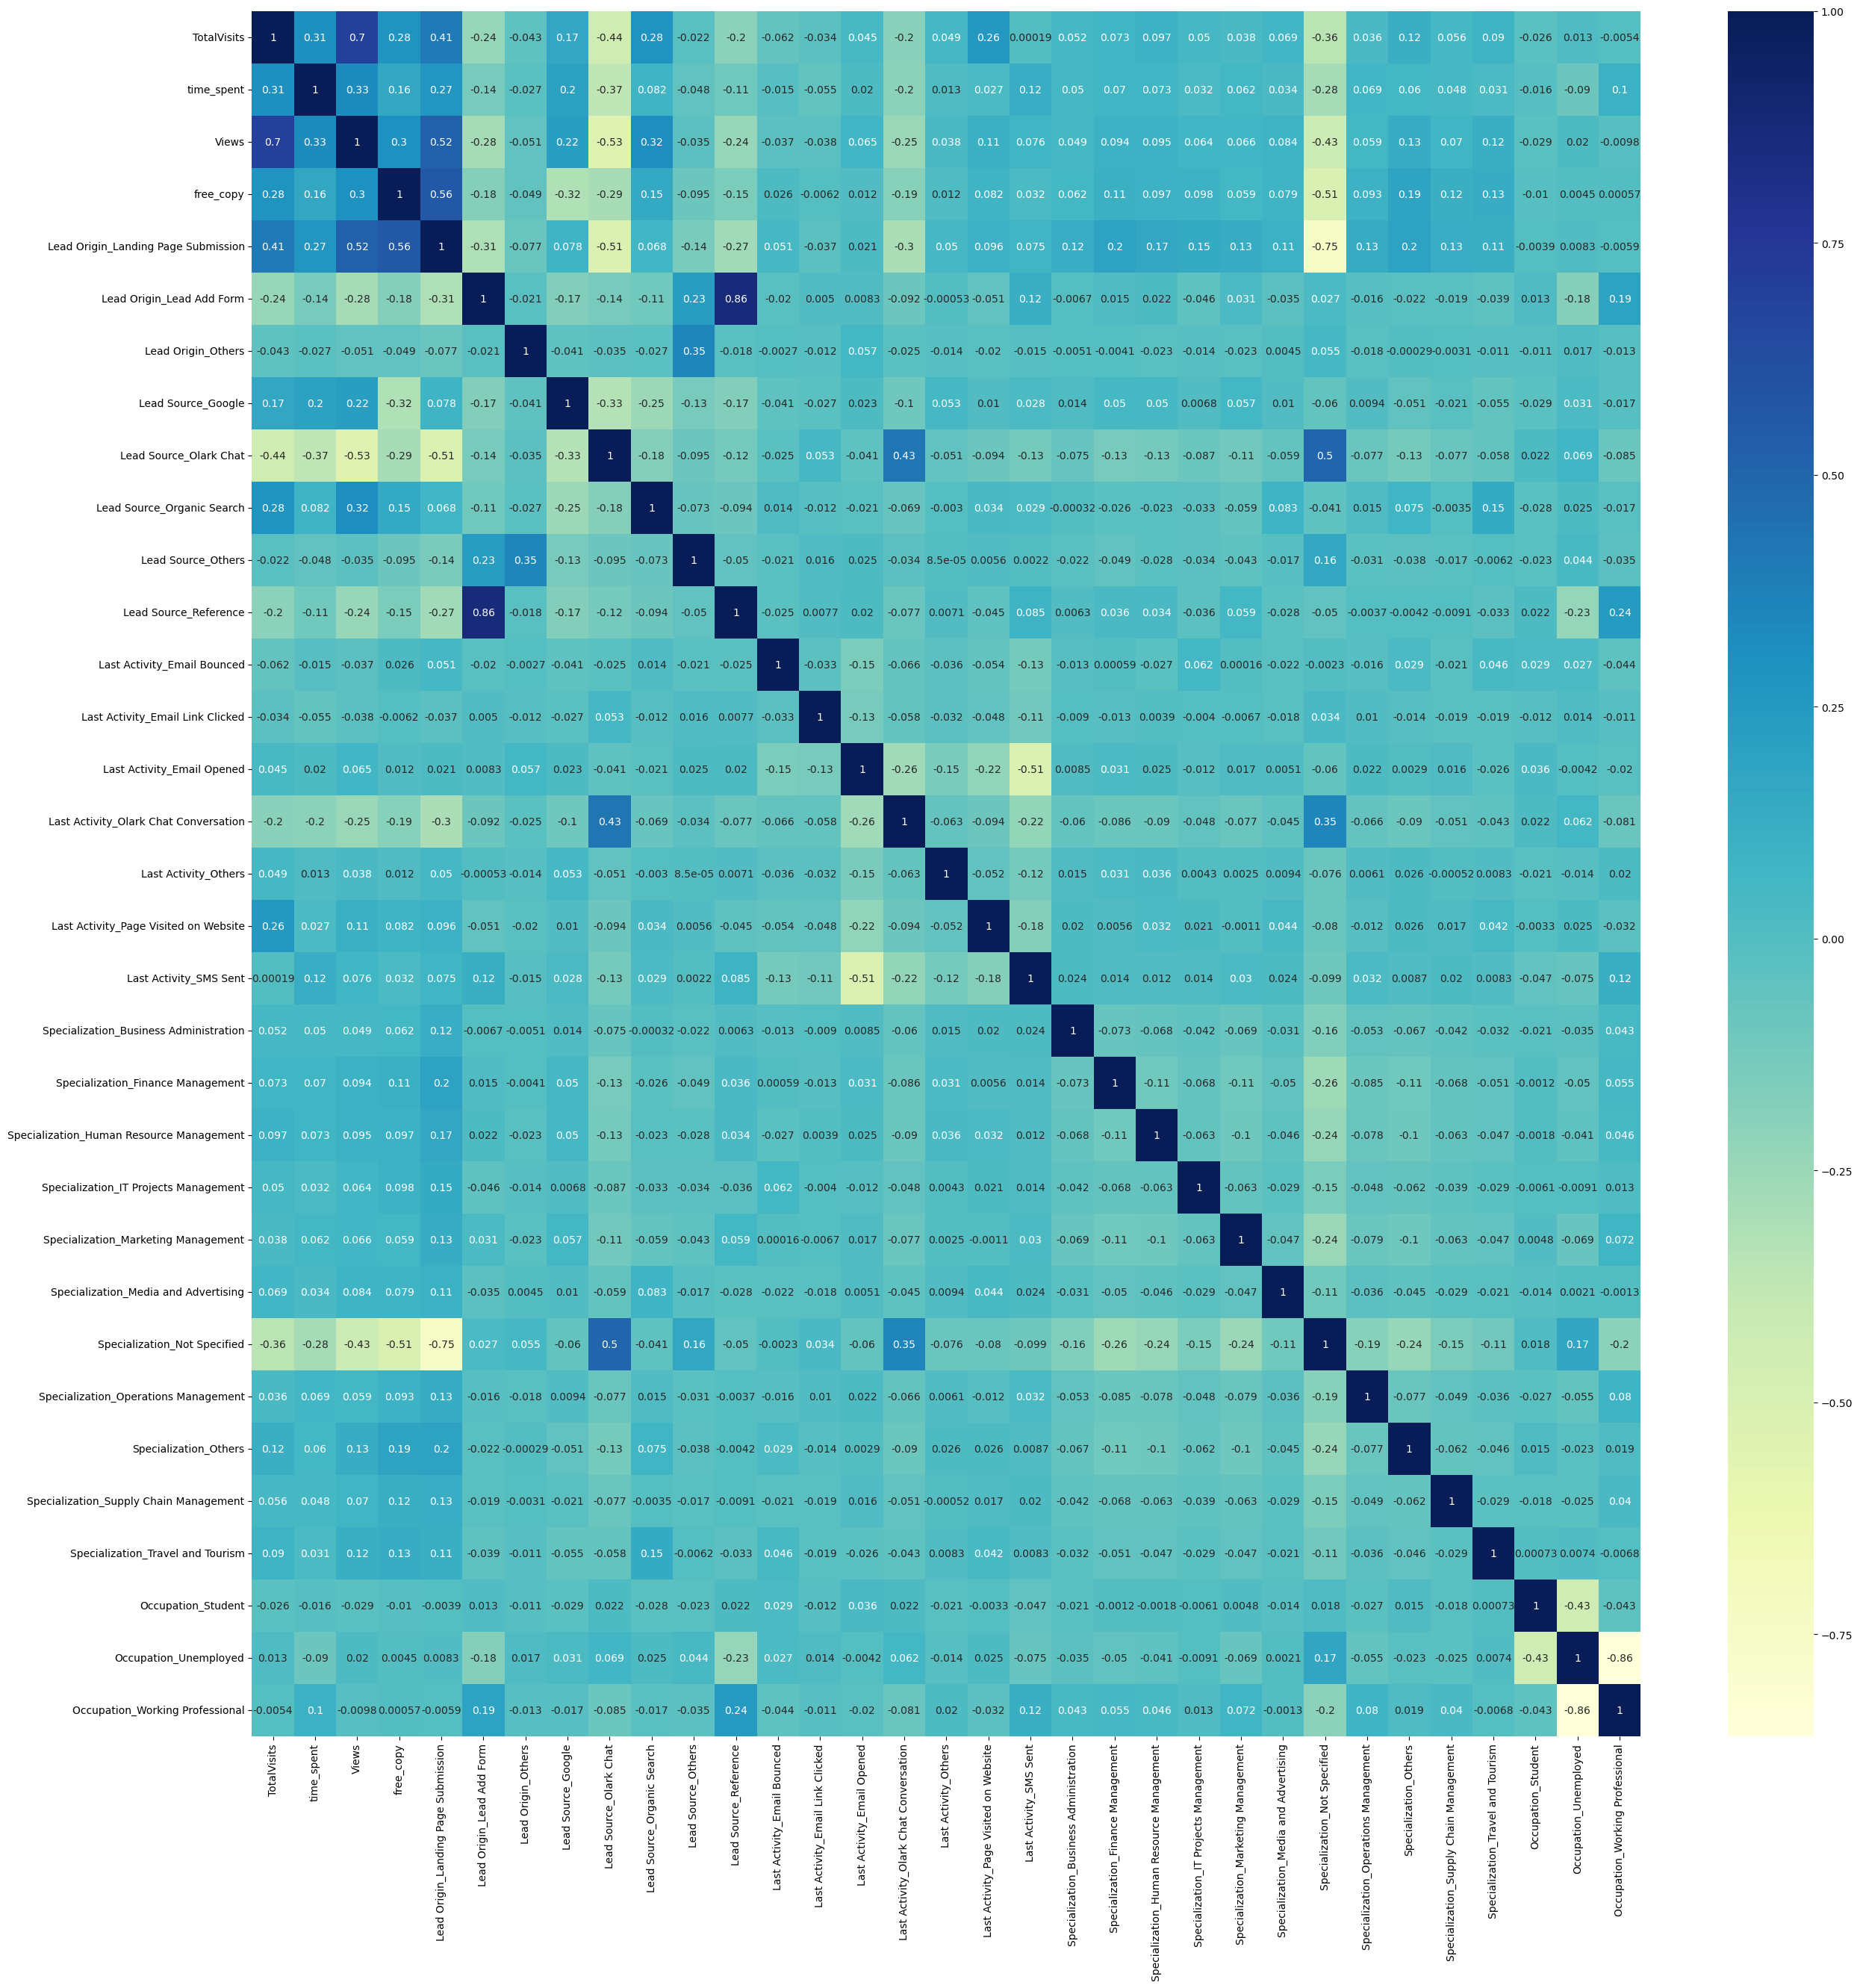

In [121]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


#### There is also high correlation between " Lead Source_through reference" and "Lead Origin_through add form"

In [122]:
Converted_Rate = (sum(ldf['Converted'])/len(ldf['Converted'].index))*100
Converted_Rate

38.53896103896104

### Model Building and Evaluation

#### First Model

In [123]:
# Logistic regression model
lr1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lr1.fit()

In [124]:
print(lr1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.0
Date:                Sun, 05 Mar 2023   Deviance:                       5376.0
Time:                        19:41:50   Pearson chi2:                 7.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3924
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [125]:
#Total number of columns
print(len(X_train.columns))

33


### We have currently 33 features in our Model

### We use Recursive Feature Elimination in our second model build, we will reduce number of features from 33 to 20 using RFE

#### Second Model

In [126]:
#Importing Logistic Regression module from SkLearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [127]:
#We currently have 33 features with respect to our discussion, and since 33 is a huge number we will reduce it to 20 columns using RFE.
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [128]:
#Printing all the columns that are selected using RFE
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True])

In [129]:
#List of all columns on priority ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('time_spent', True, 1),
 ('Views', True, 1),
 ('free_copy', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Human Resource Management', False, 7),
 ('Specialization_IT Projects Management', False, 12),
 ('Specialization_Marketing Management', False, 9),
 ('S

In [130]:
#This list will hold all the data that is being selected through RFE.
col = X_train.columns[rfe.support_]

In [131]:
col

Index(['TotalVisits', 'time_spent', 'Views', 'free_copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [132]:
#Columns that have been rejected because of RFE.
X_train.columns[~rfe.support_]

Index(['Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

In [133]:
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.1
Date:                Sun, 05 Mar 2023   Deviance:                       5390.2
Time:                        19:41:54   Pearson chi2:                 7.95e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [136]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Occupation_Unemployed,18.14
4,Lead Origin_Landing Page Submission,7.81
5,Lead Origin_Lead Add Form,7.02
9,Lead Source_Reference,6.19
16,Specialization_Not Specified,4.86
12,Last Activity_Email Opened,4.34
15,Last Activity_SMS Sent,3.74
7,Lead Source_Olark Chat,2.91
2,Views,2.58
19,Occupation_Working Professional,2.34


### We have reduced number of features from 33 to 20 

### Third Model ( Lead Source_Others)

### We will be shifting to manual feature elimination from here on : We will eliminate Lead Source_Others as this feature has high P value

In [138]:
col = col.drop('Lead Source_Others')
col

Index(['TotalVisits', 'time_spent', 'Views', 'free_copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional'],
      dtype='object')

In [139]:
print(len(col))

19


In [140]:
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.4
Date:                Sun, 05 Mar 2023   Deviance:                       5390.9
Time:                        19:45:55   Pearson chi2:                 7.95e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Occupation_Unemployed,18.09
4,Lead Origin_Landing Page Submission,7.80
5,Lead Origin_Lead Add Form,4.84
15,Specialization_Not Specified,4.84
8,Lead Source_Reference,4.44
11,Last Activity_Email Opened,4.34
14,Last Activity_SMS Sent,3.73
7,Lead Source_Olark Chat,2.89
2,Views,2.58
18,Occupation_Working Professional,2.33


### Observation :
1) Lead origin_Others and Occupation_student has high P value, so in the next model we will eliminate one of them

### Fourth Model ( Occupation_Student)

In [142]:
col = col.drop('Occupation_Student')
col

Index(['TotalVisits', 'time_spent', 'Views', 'free_copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [143]:
print(len(col))

18


In [144]:
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.9
Date:                Sun, 05 Mar 2023   Deviance:                       5391.9
Time:                        19:45:55   Pearson chi2:                 7.96e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Occupation_Unemployed,12.97
4,Lead Origin_Landing Page Submission,6.64
5,Lead Origin_Lead Add Form,4.83
8,Lead Source_Reference,4.40
15,Specialization_Not Specified,4.22
11,Last Activity_Email Opened,3.92
14,Last Activity_SMS Sent,3.48
7,Lead Source_Olark Chat,2.84
2,Views,2.57
3,free_copy,2.21


### Observation :
1) Lets eliminate Lead Origin_Others feature as well

2) Occupation Unemployed has high VIF - indicating multicollinearity

### Fifth Model (Lead Origin_Others)

In [146]:
col = col.drop('Lead Origin_Others')
col

Index(['TotalVisits', 'time_spent', 'Views', 'free_copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [147]:
print(len(col))

17


In [148]:
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.6
Date:                Sun, 05 Mar 2023   Deviance:                       5393.1
Time:                        19:45:56   Pearson chi2:                 7.96e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Occupation_Unemployed,12.91
4,Lead Origin_Landing Page Submission,6.58
5,Lead Origin_Lead Add Form,4.81
7,Lead Source_Reference,4.40
14,Specialization_Not Specified,4.22
10,Last Activity_Email Opened,3.90
13,Last Activity_SMS Sent,3.47
6,Lead Source_Olark Chat,2.79
2,Views,2.56
3,free_copy,2.21


### Observation:
1) Last Activity - Email link clicked - has p value > 5

2) Occupation unemployed has high VIF and need to eliminated

### Sixth Model (Occupation_Unemployed)

In [150]:
col = col.drop('Occupation_Unemployed')
col

Index(['TotalVisits', 'time_spent', 'Views', 'free_copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Occupation_Working Professional'],
      dtype='object')

In [151]:
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.4
Date:                Sun, 05 Mar 2023   Deviance:                       5398.9
Time:                        19:45:56   Pearson chi2:                 8.00e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3902
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,4.77
7,Lead Source_Reference,4.37
4,Lead Origin_Landing Page Submission,4.31
10,Last Activity_Email Opened,3.00
14,Specialization_Not Specified,2.88
13,Last Activity_SMS Sent,2.76
6,Lead Source_Olark Chat,2.71
2,Views,2.56
3,free_copy,2.17
0,TotalVisits,2.03


### Seventh Model (Last Activity_Email Link Clicked)

In [153]:
col = col.drop('Last Activity_Email Link Clicked')
col

Index(['TotalVisits', 'time_spent', 'Views', 'free_copy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Occupation_Working Professional'],
      dtype='object')

In [154]:
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.2
Date:                Sun, 05 Mar 2023   Deviance:                       5402.4
Time:                        19:45:56   Pearson chi2:                 8.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3899
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,4.75
7,Lead Source_Reference,4.36
4,Lead Origin_Landing Page Submission,4.04
9,Last Activity_Email Opened,2.73
13,Specialization_Not Specified,2.69
6,Lead Source_Olark Chat,2.64
2,Views,2.55
12,Last Activity_SMS Sent,2.53
3,free_copy,2.17
0,TotalVisits,2.03


### This becomes our final Logistic regression model for predicting the conversion of leads;

### As we can infer from the coefficients, the lead origin from Add form and Occupation are features of importance for this regression model

### The regression equation looks as below:

### ln(odds)= -1.0827 * const + 0.3128 * TotalVisits + 1.0635* Time Spent -0.2665 * Page per views -0.34 * free copy of mastering the interview - 0.9596 * Lead Origin_Landing Page Submission+4.2382 * Lead Origin_Lead Add Form+1.0214 * Lead Source_Olark Chat - 1.2020 * Lead Source_Reference - 1.1689 * Last Activity_Email Bounce + 0.8856 * Last Activity_Email Opened - 0.6316 * Last Activity_Olark Chat Conversation + 0.6935 * Last Activity_Others + 1.9996 * Last Activity_SMS Sent - 1.1767 * Specialization_Not Specified + 2.6970 * Occupation_Working Professional


### Prediction of Y - values, as per the final model

In [158]:
#Getting the predicted values on the train set
#X_train_sm will provide the predictor variable. 
#res will contain the Logistic Regression model result
#y_train_Pred will provide us the Predicted Y Values for the given feature variables.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.469394
6795    0.078065
3516    0.278477
8105    0.769546
3934    0.214283
4844    0.991362
3297    0.110978
8071    0.993803
987     0.159759
7423    0.872070
dtype: float64

In [159]:
#Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_pred = y_train_pred.values.reshape(-1)

In [160]:
#Creating a data frame with the actual Converted score and Probability of conversion
#The dataframe is stored in the variable y_train_pred_final.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Cust_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id
0,0,0.469394,1871
1,0,0.078065,6795
2,0,0.278477,3516
3,0,0.769546,8105
4,0,0.214283,3934


In [161]:
#Mapping the prediction conversion Rate according to the probability cut off of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted
0,0,0.469394,1871,0
1,0,0.078065,6795,0
2,0,0.278477,3516,0
3,0,0.769546,8105,1
4,0,0.214283,3934,0


### Evaluation Metrics for the Final model

In [162]:
#Importing the required libraries for metric calculation
from sklearn import metrics

# Confusion matrix - Final Model 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3578  424]
 [ 814 1652]]


In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8085961657390229


In [164]:
 #Calculation of Final Model characteristics.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [165]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6699107866991079

In [166]:
#Let's calculate specificity
TN / float(TN+FP)

0.8940529735132434

In [167]:
#Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10594702648675662


In [168]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8146630236794171


### As we can see the sensitivity for this threshold of 0.5 is 65 % which is a low value; For our problem we need 1's (Converted) to be predicted correctly
### We need to get an optimum threshold probablity to have more confidence in our predictions of getting converted

### ROC curve and its parameters

In [169]:
#Function to plot and draw ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [170]:
#Calculation and FPR and TPR and thresholds for trade off Sensitivity and Specificity.
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

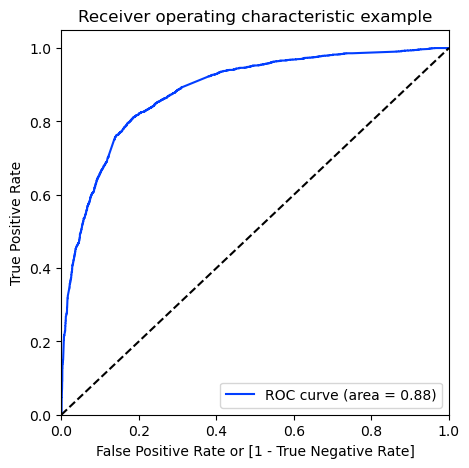

In [171]:
#Invoking the function to plot ROC - Curve. 
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [172]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.469394,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.078065,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.278477,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.769546,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.214283,3934,0,1,1,1,0,0,0,0,0,0,0


In [173]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.603587  0.970803  0.377311
0.2   0.2  0.727427  0.927818  0.603948
0.3   0.3  0.797001  0.834955  0.773613
0.4   0.4  0.817100  0.778994  0.840580
0.5   0.5  0.808596  0.669911  0.894053
0.6   0.6  0.799011  0.598540  0.922539
0.7   0.7  0.782777  0.518248  0.945777
0.8   0.8  0.759276  0.418491  0.969265
0.9   0.9  0.707483  0.250203  0.989255


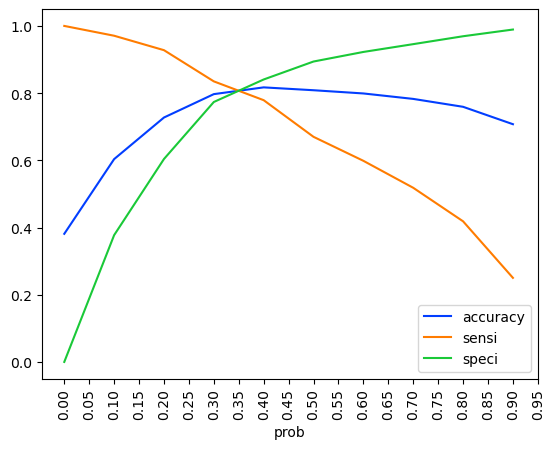

<Figure size 1100x1100 with 0 Axes>

In [174]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.tight_layout()
plt.show()

### As we look at the curve above the optimum probability cut off would be where accuracy curve,sensitivity curve and specificity curve meet, and these 3 curves meet roughly at probability of 0.35. Hence its concluded that probablility value of less than 0.35 is labelled as 0 ( not converted) and probability value of greater than 0.35 is labelled as 1 ( Converted)

### We can go further lower than 0.35 and be more stringent about getting the 1's , but for now we will go ahead with 0.35 as this seems the optimum probabilty for getting a balanced model

In [175]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.469394,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.078065,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.278477,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.769546,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.214283,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [176]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8132343846629561

In [177]:
#Confusion matrix after probability cutoff : 0.35 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3266,  736],
       [ 472, 1994]], dtype=int64)

In [178]:
#Confusion Matrix - Calculating all parameters.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8085969180859692

In [180]:
#Let us calculate specificity
TN / float(TN+FP)

0.8160919540229885

In [181]:
#Calculate false postive rate - predicting conversion rate when customer will be a hot lead or not(FPR)
## FPR is expected to be low
print(FP/ float(TN+FP))

0.1839080459770115


In [182]:
#Positive predictive value 
print (TP / float(TP+FP))

0.7304029304029304


In [183]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8737292669876939


* Thus our Model with 0.35 as cut off probability has the following Metrics for the training Data set:

### 1) Accuracy = 81 %

### 2) Sensitivity = 79 %

### 3) Specificity = 82 %

### Model Evaluation - ON TEST SET

In [184]:
ldf.head()

,Prospect ID,Lead Number,Converted,TotalVisits,time_spent,Views,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,...,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [185]:
#Perform all the scaling on the available features.
X_test[['TotalVisits','time_spent','Views']] = scaler.transform(X_test[['TotalVisits','time_spent','Views']])

In [186]:
#Selecting all the features, which are selected as per final model
#col has all the features available in the final model.

X_test = X_test[col]
X_test.head()

,TotalVisits,time_spent,Views,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Occupation_Working Professional
4269,1.433341,0.964504,2.892276,0,0,0,0,0,0,0,0,0,1,1,0
2376,-1.022595,-0.885371,-1.180474,0,0,1,0,1,0,0,0,0,1,1,0
7766,0.512365,-0.777416,1.364995,0,0,0,0,0,0,0,0,1,0,0,1
9199,-1.022595,-0.885371,-1.180474,0,0,0,1,0,0,0,1,0,0,1,0
4359,-1.022595,-0.885371,-1.180474,0,0,1,0,1,0,1,0,0,0,0,0


### Building the model - ON TEST SET

In [187]:
#Adding a constant for X_Test.
X_test_sm = sm.add_constant(X_test)

In [188]:
#y_test_pred - X_test_sm has all the features after model building
#res = > Result of model building

y_test_pred = res.predict(X_test_sm)

In [189]:
#Displaying all the predicted values
y_test_pred[:10]

4269    0.609114
2376    0.861707
7766    0.782027
9199    0.056436
4359    0.869016
9186    0.490880
1631    0.418120
8963    0.152567
8007    0.080268
5324    0.310631
dtype: float64

### **Creating a dataframe with the predicted values**

In [190]:
#Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4269,0.609114
2376,0.861707
7766,0.782027
9199,0.056436
4359,0.869016


In [191]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [192]:
#Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [193]:
#Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [195]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.609114
1,1,2376,0.861707
2,1,7766,0.782027
3,0,9199,0.056436
4,1,4359,0.869016


In [196]:
#Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [197]:
#Predicting the test model on cut off probabilty
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [198]:
#Displaying the predicted value dataframe.
y_pred_final.head()

,Converted,CustID,Conversion_Prob,final_predicted
0,1,4269,0.609114,1
1,1,2376,0.861707,1
2,1,7766,0.782027,1
3,0,9199,0.056436,0
4,1,4359,0.869016,1


**Calculation of Model Evaluation parameters**

In [199]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8033910533910534

In [200]:
confusionTest= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusionTest

array([[1354,  323],
       [ 222,  873]], dtype=int64)

In [201]:
TP = confusionTest[1,1] # true positive 
TN = confusionTest[0,0] # true negatives
FP = confusionTest[0,1] # false positives
FN = confusionTest[1,0] # false negatives

In [202]:
#Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) 
print(sensitivity)

0.8


In [203]:
#Let's calculate specificity
TN / float(TN+FP)

0.8073941562313656

* For the Test data set the model evaluation metric having probability threshold of 0.35 is as below:

### 1) Accuracy = 80 %

### 2) Sensitivity = 80 %

### 3) Specificity = 80.7 %

* Of the total number of actual converted leads from the test data set , our model predicts 80 % of them correctly as converted

### Assigning the "Lead Score" in the original lead data frame (Train+Test)
### This is done to easily show the "Hot leads" to the management , and to grab their attention

In [204]:
#Preparing the dataframe - to scale the variables and prepare the complete data.
X[['TotalVisits','time_spent','Views']] = scaler.transform(X[['TotalVisits','time_spent','Views']])

In [205]:
#Selecting the features in our final model on the scaled dataframe.
X = X[col]
X.head()

,TotalVisits,time_spent,Views,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Occupation_Working Professional
0,-1.022595,-0.885371,-1.180474,0,0,0,1,0,0,0,0,0,0,1,0
1,0.512365,0.347879,0.092260,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.408611,1.917803,-0.162287,1,1,0,0,0,0,1,0,0,0,0,0
3,-0.715603,-0.327298,-0.671380,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.408611,1.727509,-0.671380,0,1,0,0,0,0,0,0,0,0,1,0


In [206]:
X.shape

(9240, 15)

In [207]:
#Adding a constant to the dataframe
X_sm = sm.add_constant(X)

In [208]:
#Predicting the y-values on X dataframe (Leads.csv)
y_ans_pred = res.predict(X_sm)

In [209]:
#Printing the probabilities
y_ans_pred[:10]

0    0.101112
1    0.295639
2    0.612629
3    0.149081
4    0.209039
5    0.056436
6    0.732728
7    0.056436
8    0.084349
9    0.233321
dtype: float64

In [210]:
#Converting y_pred to a dataframe which is an array
y_ans_pred_df = pd.DataFrame(y_ans_pred)

In [211]:
#Converting y to dataframe
y_df = pd.DataFrame(y)

In [212]:
#Putting Lead_Number to index
y_df['Lead_Number'] = ldf['Lead Number']

In [213]:
#Removing index for both dataframes to append them side by side 
y_ans_pred_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [214]:
#Appending y_test_df and y_df
y_ans_final = pd.concat([y_df, y_ans_pred_df],axis=1)

In [215]:
#Renaming the column 
y_ans_final= y_ans_final.rename(columns={ 0 : 'Conversion_Prob'})

In [216]:
#Displaying the Answer_Dataframe
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob
0,0,660737,0.101112
1,0,660728,0.295639
2,1,660727,0.612629
3,0,660719,0.149081
4,1,660681,0.209039


### **Finding the conversion prediction using the probability cut-off = 0.35**

In [217]:
#Finding the Predicted values using the probability cut off
y_ans_final['final_predicted'] = y_ans_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [218]:
#Appending the score to the dataframe.
y_ans_final['Score'] = round(y_ans_final['Conversion_Prob'] * 100, 2)

In [219]:
#Displaying the predicted conversion on the final values
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
0,0,660737,0.101112,0,10.11
1,0,660728,0.295639,0,29.56
2,1,660727,0.612629,1,61.26
3,0,660719,0.149081,0,14.91
4,1,660681,0.209039,0,20.90


### **Evaluation Metrix for - Complete Dataframe**

In [220]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_ans_final.Converted, y_ans_final.final_predicted)

0.8102813852813853

In [221]:
#Confusion Matrix
confusionAns= metrics.confusion_matrix(y_ans_final.Converted, y_ans_final.final_predicted)
confusionAns

array([[4620, 1059],
       [ 694, 2867]], dtype=int64)

In [222]:
#Confusion Matrix - Parameters
TP = confusionAns[1,1] # true positive 
TN = confusionAns[0,0] # true negatives
FP = confusionAns[0,1] # false positives
FN = confusionAns[1,0] # false negatives

In [223]:
# Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

81.0


In [224]:
# Let us calculate specificity
TN / float(TN+FP)

0.8135235076597993

## To get the "Hot Leads"

In [225]:
#Sorting values to find the top leads. 
ResultDf = y_ans_final.sort_values(by='Score', ascending=False)

In [226]:
#Displaying the top leads
ResultDf.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
2656,1,634047,0.999649,1,99.96
3478,1,627106,0.999625,1,99.96
8074,1,588037,0.999512,1,99.95
3428,1,627462,0.999402,1,99.94
5921,1,604411,0.999326,1,99.93


In [227]:
FilteredResult = ResultDf.loc[ResultDf['Score'] >= 35]

In [228]:
print(ResultDf.shape)
print(FilteredResult.shape)

(9240, 5)
(3926, 5)


In [229]:
FilteredResult.head(10)

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
2656,1,634047,0.999649,1,99.96
3478,1,627106,0.999625,1,99.96
8074,1,588037,0.999512,1,99.95
3428,1,627462,0.999402,1,99.94
5921,1,604411,0.999326,1,99.93
7579,1,591536,0.999288,1,99.93
5671,1,606508,0.999297,1,99.93
6751,1,598055,0.999224,1,99.92
8081,1,588013,0.999039,1,99.90
8118,1,587880,0.998998,1,99.90


In [230]:
#Checking the Converted Rate
Converted_Rate_AfterModelling= (sum(FilteredResult['Converted'])/len(FilteredResult['Converted'].index))*100
Converted_Rate_AfterModelling

73.02598064187468

### The Regression model provides the marketing team a list of 3926 "Hot" leads out of 9240 leads, whose conversion rate is as high as 73 %
### These leads require nurturing , this phase is termed as " Lead nurturing phase" , where the marketing team pursues these leads and gets them converted to customers of the company
### Let's see , when we increase the score cut off, the model would converge on an elite hot leads who have a very high chance of conversion

In [231]:
Hot_leads = ResultDf.loc[ResultDf['Score'] >= 95]

In [232]:
Hot_leads.shape

(723, 5)

In [233]:
#Checking the Converion rate
Converted_Rate_ForHotLeads= (sum(Hot_leads['Converted'])/len(Hot_leads['Converted'].index))*100
Converted_Rate_ForHotLeads

95.71230982019364

### Here the Model provides a list of 723 prospective customers who have a very high chance of conversion, targteted marketing campaign for these leads is recommended as the model predicts high confidence of conversion

 ### Final Comments:
### 1)Target customers who spend more time browsing X Education online portal or website
### 2)Customers who have filled the online type form are good leads
### 3)Working professionals have better conversion rate
### 4)Focus on customers whose last activity is SMS sent and email opened
### 5)Tailor your marketing strategy and maneuver your resources based on different lead score cut offs
